# Trabalho 5 - Transformada de Hough

Faça um documento jupyter notebook que forneça, com base na transformada de Hough modelada para círculos, a contagem e a descrição (coordenadas dos centros e raio) dos discos grandes presentes na imagem do exemplo (do trabalho 3 - segmentação dos discos claros usando a transformada top-hat). 

-------

Procedimento sugerido:

Use como base o resultado do trabalho 3. Inicialmente, subtraia o resultado do trabalho 3 da imagem original a fim de obter a segmentação dos discos. Em seguida, utilize um filtro para obter as bordas dos discos e binarize o resultado. Por fim, empregue a transformada de Hough para obter as informações desejadas.

-------

In [1]:
import cv2 as cv
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

# Funções

In [10]:
def img_threshold(img, threshold = 60):
    return threshold < img

In [46]:
def img2binary(img):
    """Binarization of image with threshold given"""
    img[img > 0] = 1
    return img

In [3]:
def sobel(img):
    sobelx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobely = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    gx = cv.convertScaleAbs(cv.filter2D(img, cv.CV_64F, cv.flip(sobelx, -1)))
    gy = cv.convertScaleAbs(cv.filter2D(img, cv.CV_64F, cv.flip(sobely, -1)))
    
    return gx + gy

In [30]:
def plota(img):
    num = len(img)
    fig = plt.figure(figsize = (15, 9))
    grid = plt.GridSpec(1, num, fig)
    
    for i in range(num):
        ax = fig.add_subplot(grid[0, i])
        ax.imshow(img[i], cmap = 'gray')
        ax.set_xticks([])
        ax.set_yticks([])
    
    return fig

### Estratégia:

    1) Limiariza a entrada e a saída;
    2) Passar filtro mediano na entrada e na saída limiarizados;
    3) Fazer a diferença entra entrada e saída;
    4) Aplicar Sobel na diferença;

## Carregando as images

In [14]:
entrada = cv.imread('../images/cosmos_original.jpg', 0)
saida = cv.imread('../images/img_final.jpg', 0)

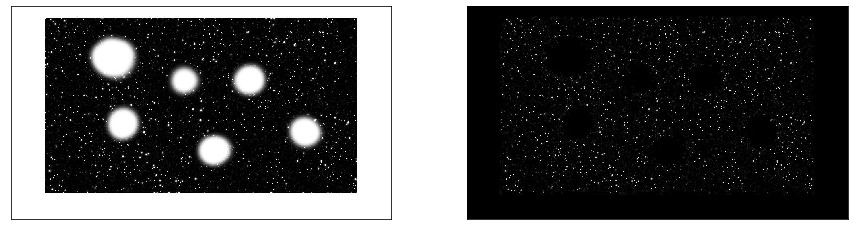

In [15]:
fig = plota([entrada, saida], 2)

In [16]:
entrada_thres = img_threshold(entrada).astype(np.uint8)
saida_thres = img_threshold(saida).astype(np.uint8)

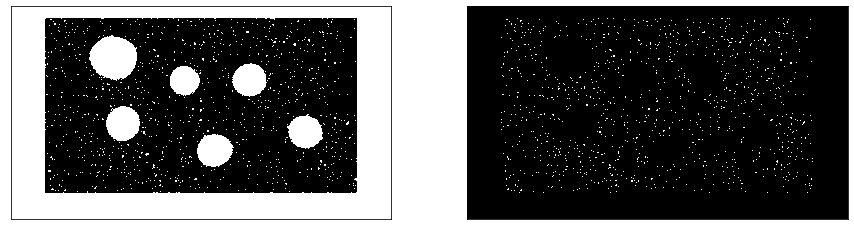

In [19]:
fig = plota([entrada_thres, saida_thres], 2)

In [20]:
entrada_thres_med = cv.medianBlur(entrada_thres, 5)
saida_thres_med = cv.medianBlur(saida_thres, 5)

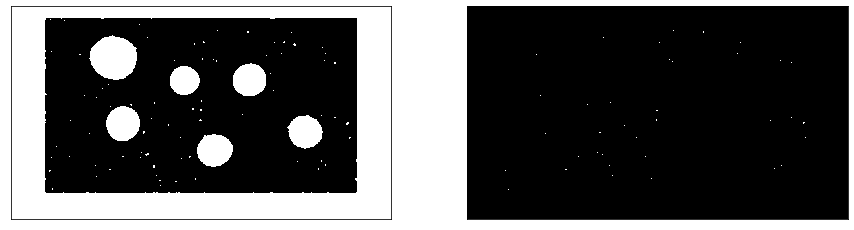

In [21]:
fig = plota([entrada_thres_med, saida_thres_med], 2)

In [22]:
diff_thres_med = entrada_thres_med - saida_thres_med

In [41]:
diff_sob = sobel(diff_thres_med)

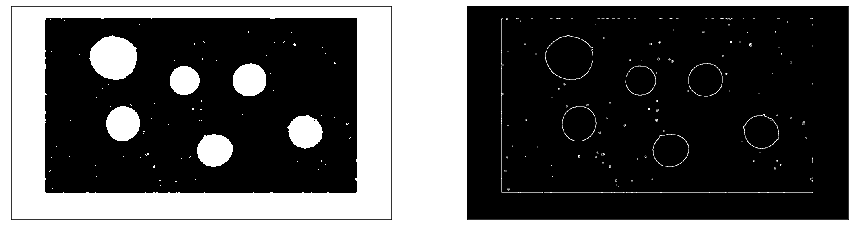

In [24]:
fig = plota([diff_thres_med, diff_sob], 2)

In [48]:
diff_sob_bin = img2binary(np.copy(diff_sob))

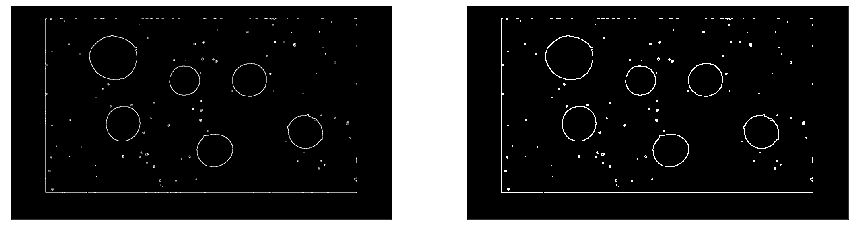

In [53]:
fig = plota([diff_sob, diff_sob_bin])

In [54]:
n_rows, n_cols = diff_sob_bin.shape

In [79]:
theta_step = 1
theta_min = 0
theta_max = 180

theta_size = len(range(theta_min, theta_max, theta_step))
theta_array = np.array(range(theta_min, theta_max + 1, theta_step))

In [80]:
rho_min = 0
rho_max = np.ceil(np.sqrt(n_rows**2 + n_cols**2))
# rho_step = np.ceil((rho_max - rho_min) / theta_size)
rho_step = 1

rho_size = len(range(np.int(rho_min), np.int(rho_max), np.int(rho_step)))

In [84]:
cummulative_matrix = np.zeros((rho_size + 1, theta_size + 1))

In [87]:
for i in range(n_rows):
    for j in range(n_cols):
        if diff_sob_bin[i, j] == 0:
            continue
        
        for theta in theta_array:
            rho = i * np.cos(np.radians(theta)) + j * np.sin(np.radians(theta))
            cummulative_matrix[int(rho), theta] = cummulative_matrix[int(rho), theta] + 1

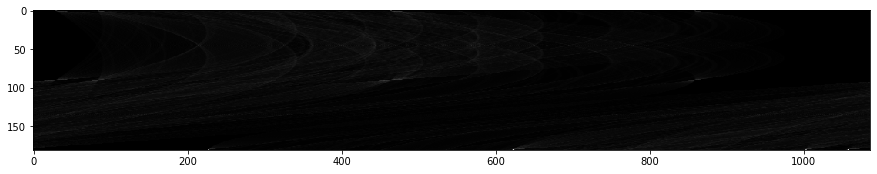

In [91]:
fig = plt.figure(figsize=(15,15))
plt.imshow(cummulative_matrix, cmap = 'gray')